# Visual Analysis of the Steam Dataset

Please download the datasets at the following link and follow the instructions in `data/README.md`. Keep note of the pathnames used to load in the datasets and ensure they match what is in `data/` directory.

https://www.gigasheet.com/sample-data/steam-game-reviews

https://www.kaggle.com/datasets/mohamedtarek01234/steam-games-reviews-and-rankings

# A. Data Card

This section will explain what is contained in each point of our dataset.

### Datasets

*Steam Game Reviews:* https://www.gigasheet.com/sample-data/steam-game-reviews ~464MB

This dataset consists of ~990K rows of reviews taken from SteamDB, a database for the video game vendor, Steam.

*Steam Game Reviews and Rankings:* https://www.kaggle.com/datasets/mohamedtarek01234/steam-games-reviews-and-rankings ~1MB
 
This dataset is where we source game metadata to enrich our review information. This will help give better insights into the relationship between the kind of game and the reviews.

**Shape**

*Steam Game Reviews:* (992153, 8)

*Steam Game Reviews and Rankings:* (290, 13)

*Merged Working Dataset:* (992153, 24)

**Time**

This dataset covers review information from 2010-2024, with far more data coming from more recent time. (View visuals for review count by month/year)

### Column Dictionary

**For the working merged dataset**

**Provided Columns**    
`review` - The user's review string for the game   
`hours_played` - the amount of hours of the game the user played when they posted the review   
`helpful` - the amount of 'helpful' votes the user received from other users for their review   
`funny` - the amount of 'funny' votes the user received from other users for their review   
`recommendation` - whether the user recommends the game or not (0 - no, 1 - yes)   
`date` - the date when the user posted the review   
`game_name` - name of the game the user reviewed   
`username` - the user's personal alias   
`short_description` - the shortened description of the game from SteamDB   
`long_description` - the full description of the game from SteamDB   
`genres` - The list of genres that the game belongs to (ie. Action, Adventure, Horror...)   
`minimum_system_requirements` - the minimum hardware specs needed to run the game   
`recommended_system_requirements` - the hardware specs recommended by the developer to run the game smoothly   
`release_date` - the date when the game was released   
`developer` - the studio who developed the game   
`publisher` - the parent company that licensed the development of the game   
`overall_player_rating` - the overall average rating all reviews gave to the game (categorical)   
`number_of_reviews_from_purchased_people` - total number of reviews from players who purchased the game   
`number_of_english_reviews` - total number of reviews in english from players who purchased the game   
`link` - the link to the Steam page of the game   

**Created Columns by Us**     
`popular` - boolean value whether or not the review has >50 helpful votes   
`cat_playtime` - categorized bucketing for playtime hours     
`rec_ratio` - the ratio for recommended reviews to total reviews for the game based on the dataset reviews     
`in_sale` - a boolean that tells whether the review was posted during major sale periods (Summer - July, Winter - January)    

`release_year` - numeric column of just the year taken out of the `release_date` column. 

### Missingness Snapshot

*Steam Reviews*   
503 total missing reviews    
81 usernames    

*Steam Game Metadata*    
13 short descriptions (can be manually filled in)   

*Merged Working Dataset*    
Dates                                      1775    
short_description                          66892       
long_description                           66892    
genres                                     66892     
minimum_system_requirement                 66892   
recommend_system_requirement               66892    
release_date                               76879    
developer                                  66892    
publisher                                  66892    
overall_player_rating                      66892   
number_of_reviews_from_purchased_people    66892    
number_of_english_reviews                  66892   
link                                       66892   

The missing information from the merged dataset stems from the 11 games not covered by the metadata dataset. Can be filled manually.

### Quirks

1. Recent reviews do not include the year (because on Steam if a review is recent then it is just denoted by month and day). This was remedied by simply applying the year 2024 to all reviews missing a year. (data was collected in September of 2024)
2. A few usernames are poorly formatted and need to be fixed
3. 11 Games are missing metadata and can be filled manually
4. If a publisher owns their own development studio, then the publisher and developer will be the same.
5. A few of the review fields contain the year and need to be removed.
6. Genres, system requirements, and long_description are all list objects.

# 2 - Setup (RUN 01_explore.ipynb first before beginning here)

### 2.1 Imports

Handles imports needed to run all cells in the notebook. If you haven't yet please run `pip install -r requirements.txt` 
in the main directory console to get necessary dependencies.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2.2 Load Exporation Dataset (READ HERE)

You must run the `01_explore.ipynb` to create the `steamdataset.csv` to begin working in this notebook. Please ensure you have `steamdataset.csv` in your data folder.

In [49]:
steamdataset = pd.read_csv('../data/steamdataset.csv')
steamdataset

,review,hours_played,helpful,funny,recommendation,date,game_name,username,short_description,long_description,...,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link,popular,cat_playtime,rec_ratio,in_sale
0,The game itself is also super fun. The PvP and...,39.9,1152,13,1,2024-09-14,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,...,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,True,10+ hours,0.834706,0
1,Never cared much about Warhammer until this ga...,91.5,712,116,1,2024-09-13,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,...,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,True,50+ hours,0.834706,0
2,A salute to all the fallen battle brothers who...,43.3,492,33,1,2024-09-14,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,...,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,True,10+ hours,0.834706,0
3,this game feels like it was made in the mid 20...,16.8,661,15,1,2024-09-14,"Warhammer 40,000: Space Marine 2",Fattest_falcon,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,...,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,True,10+ hours,0.834706,0
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,1,2024-09-12,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,...,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,True,10+ hours,0.834706,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991645,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,1,2022-08-04,Turbo Golf Racing,"Fatal Exit\n1,902 products in account",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,<10 hours,0.868545,0
991646,2022 Early Access Review Great fun!,8.5,1,0,1,2022-08-04,Turbo Golf Racing,cleybaR,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,<10 hours,0.868545,0
991647,2022 Early Access Review Excellent pick up and...,83.3,2,0,1,2022-08-04,Turbo Golf Racing,Sim\n600 products in account,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,50+ hours,0.868545,0
991648,2022 Early Access Review This game is so much ...,3.8,1,0,1,2022-08-04,Turbo Golf Racing,Fatboybadboy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,<10 hours,0.868545,0


In [50]:
steamdataset["release_date"] = pd.to_datetime(steamdataset["release_date"])
steamdataset["date"] = pd.to_datetime(steamdataset["date"])

# Hypotheses

### Question 1
What correlation is there between positive reviews and player retention?

Our hypothesis for this is that there is a positive correlation. 

It makes sense to assume that a well received game will have longer player retention, but we can test this with a categorical plot

In [51]:
steamdataset['overall_player_rating'].unique()

array(['Very Positive', 'Overwhelmingly Positive', 'Mixed',
       'Mostly Positive', nan, 'Mostly Negative'], dtype=object)

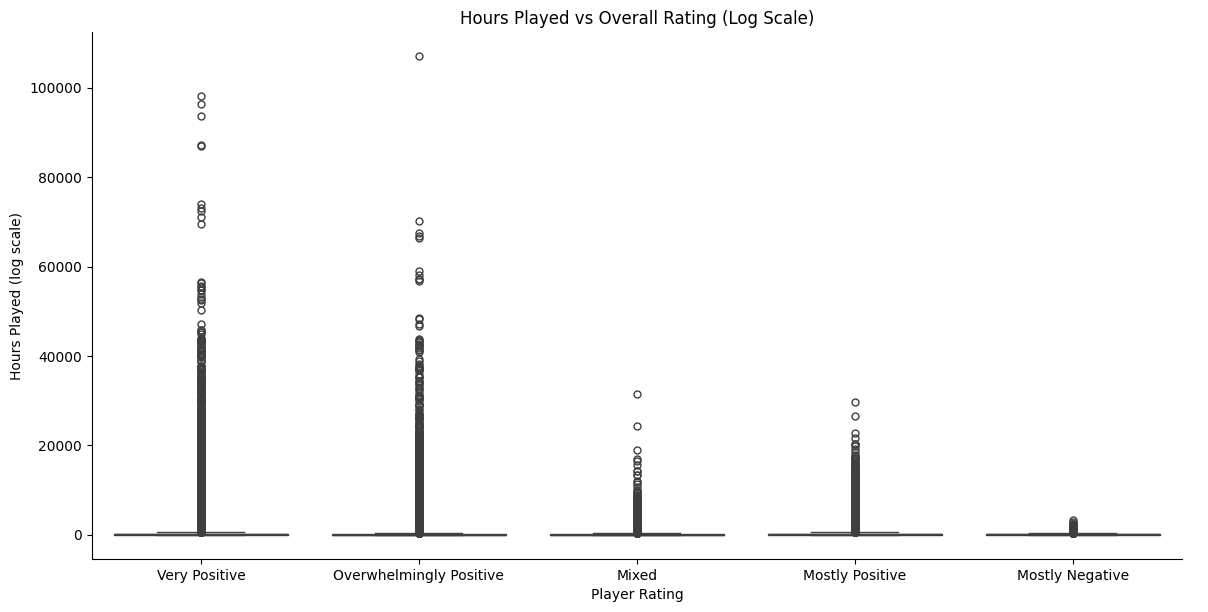

In [53]:
sns.catplot(data=steamdataset,
            x="overall_player_rating",
            y="hours_played",
            kind="box",
            height=6,
            aspect=2)

plt.title("Hours Played vs Overall Rating (Log Scale)")
plt.xlabel("Player Rating")
plt.ylabel("Hours Played (log scale)")
plt.show()

Let's zoom in on it a little bit.

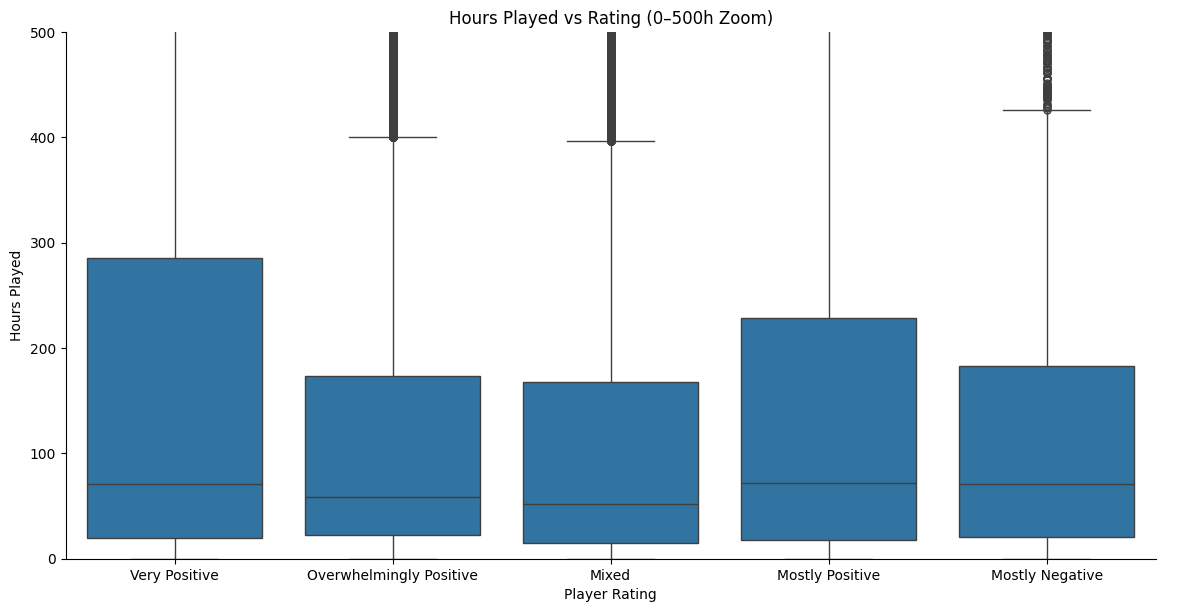

13.4% of players have >500 hours


In [54]:
sns.catplot(
    data=steamdataset,
    x="overall_player_rating",
    y="hours_played",
    kind="box",
    height=6,
    aspect=2
)


plt.ylim(0, 500)
plt.title("Hours Played vs Rating (0–500h Zoom)")
plt.xlabel("Player Rating")
plt.ylabel("Hours Played")
plt.show()

# Find how many are in the outliers
outlier_pct = (steamdataset["hours_played"] > 500).mean() * 100
print(f"{outlier_pct:.1f}% of players have >500 hours")

As we can see from the data, games with more positive ratings have more overall hours played than games with more negative ratings. 

This matches with our hypothesis that there's a positive correlation between player retention and positive reviews.

### Question 2
Which genres have the best reviews?

Our hypothesis is that bigger open world games will have the best reviews.

This is due to the most popular multiplayer genres like shooters tending to have a lot of negativity around them, leading to worse reviews.

Meanwhile more relaxed games don't have the same negativity, leaving the playerbase more positive and more likely to leave a good review.

We can test this with a regression plot that we base off the top 10 most popular genres in this dataset.

In [55]:
import ast
steamdataset["genres"] = steamdataset["genres"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
exploded = steamdataset.explode("genres")
top_genres = exploded["genres"].value_counts().head(10).index.tolist()
filtered_df = exploded[exploded["genres"].isin(top_genres)]


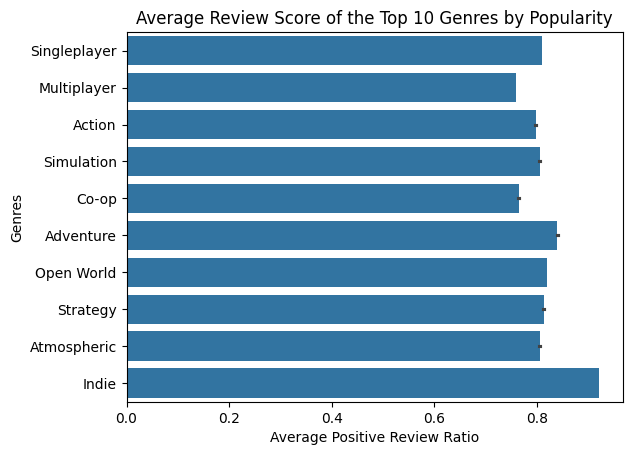

In [56]:
sns.barplot(
    data=filtered_df,
    x="rec_ratio",
    y="genres",
    estimator="mean",
    order=top_genres
)
plt.title("Average Review Score of the Top 10 Genres by Popularity")
plt.xlabel("Average Positive Review Ratio")
plt.ylabel("Genres")
plt.show()

According to the results, we can see that Indie games are actually the genre that gets the highest reviews overall. 

Of the top 10 genres, Open World games are in the middle of the pack, while Shooter games didn't even make the list. 

This shows we were off on our hypothesis, but also reflects how the honest work put into indie games pays off with good reviews.

### Question 3 graph takes a few minutes
Are newer games rated better than older ones?

Going off of the previous questions, we hypothesize that older games are rated better on average, due to factors like nostalgia and many current games being produced with the goal of making a profit rather than providing an experience.

We can test this with a small multiples grid.

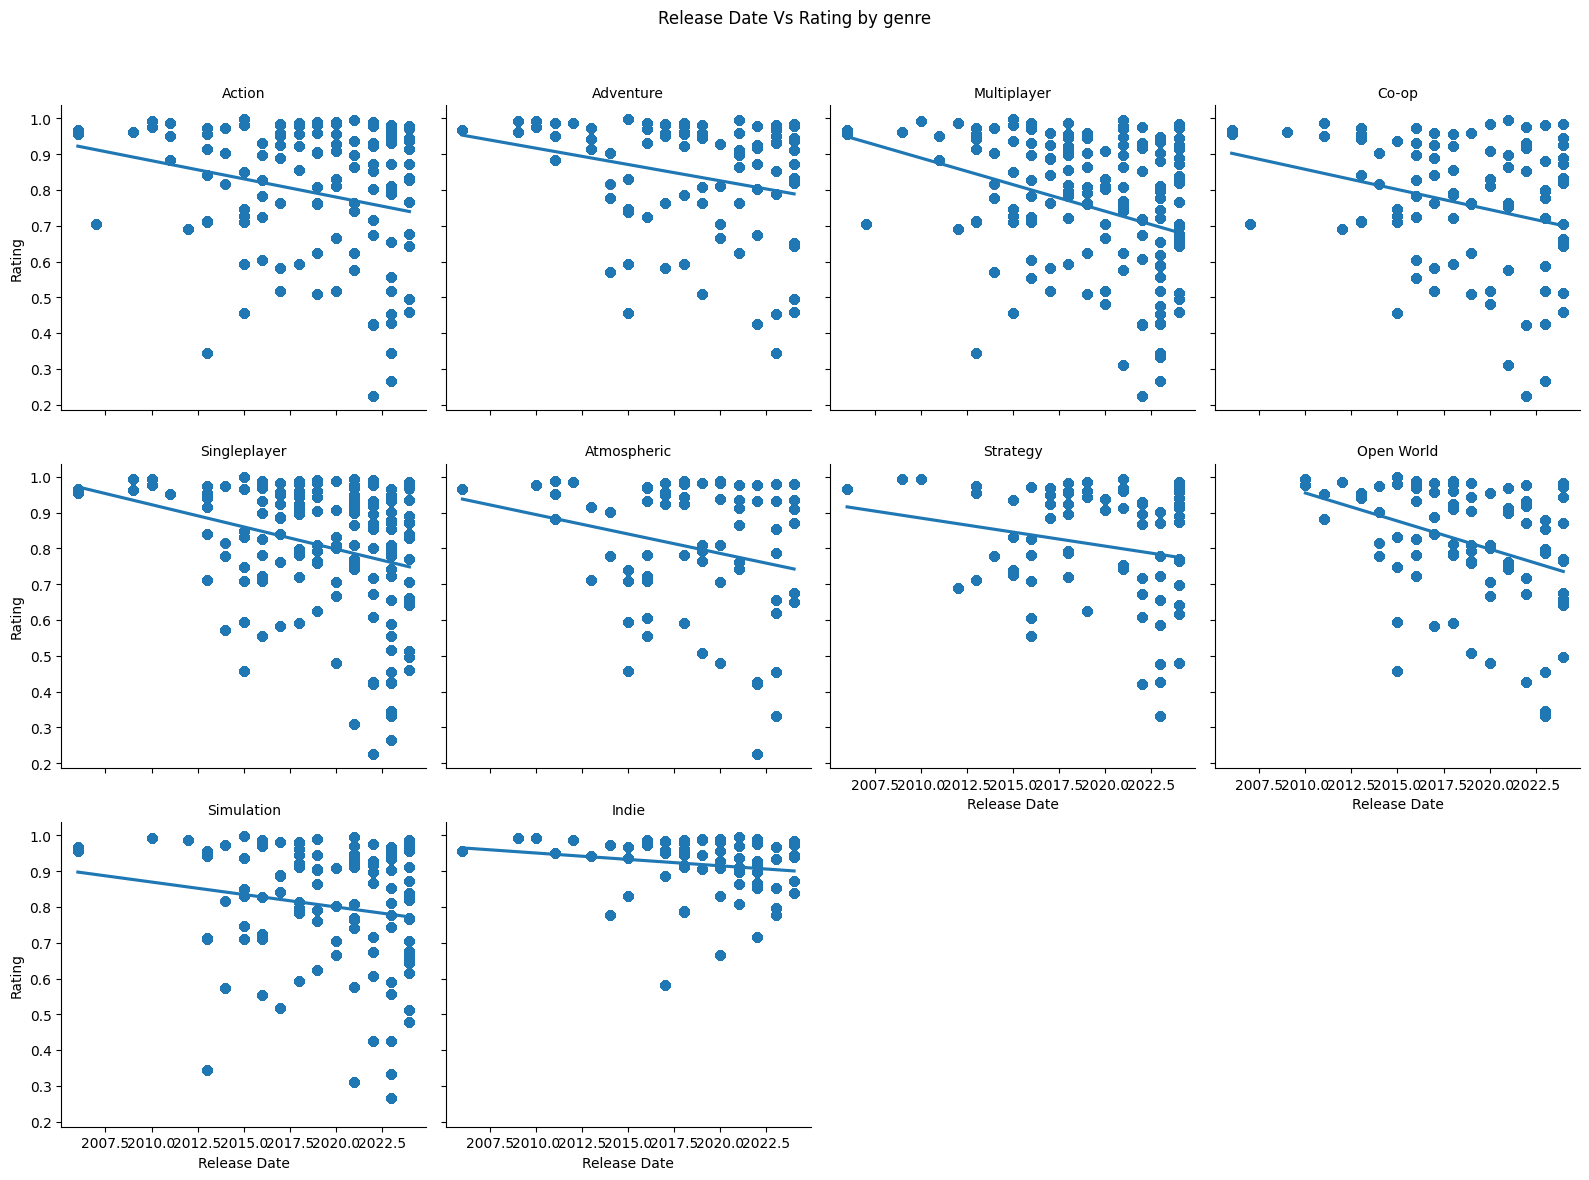

In [ ]:
top_genre_df = exploded[exploded["genres"].isin(top_genres)].copy()
top_genre_df["release_year"] = top_genre_df["release_date"].dt.year

g = sns.lmplot(
    data=top_genre_df,
    x="release_year",
    y="rec_ratio",
    col="genres",
    col_wrap=4,
    scatter_kws={'alpha': 0.3},
    height=4
)

g.set_axis_labels("Release Date", "Rating")
g.set_titles(col_template="{col_name}")
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle("Release Date Vs Rating by genre")
plt.show()

Thanks to the downward facing slopes, we can see that for every genre in the top 10, reviews have in fact gotten worse over time, matching our hypothesis.

We believe this is due to the worsening effects of capitalism on the market, causing more recent games to have less passion behind them regardless of genre.